In [1]:
## Demarrage du projet ##
1+1 #Ca porte chance

2

In [3]:
from Training import Train
from Evaluation import SignalEvaluator
from Data import DataLoader

from PreProcessing.domaines.passage_freq import ajout_signal_frequentiel

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
## Chargement des données
data_loader = DataLoader.DataLoader()
radar_data = data_loader.load_data()

In [7]:
ajout_signal_frequentiel(radar_data)

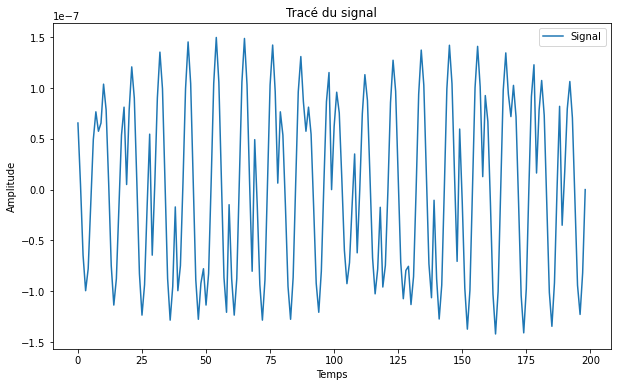

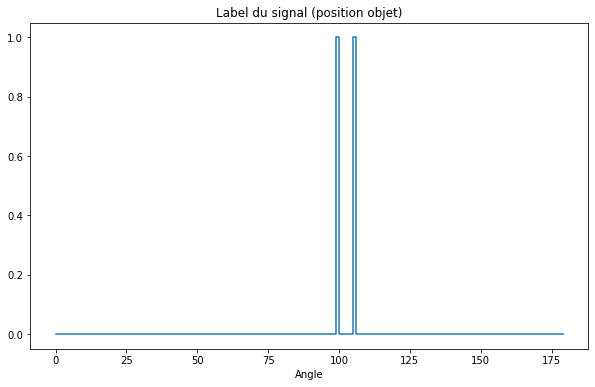

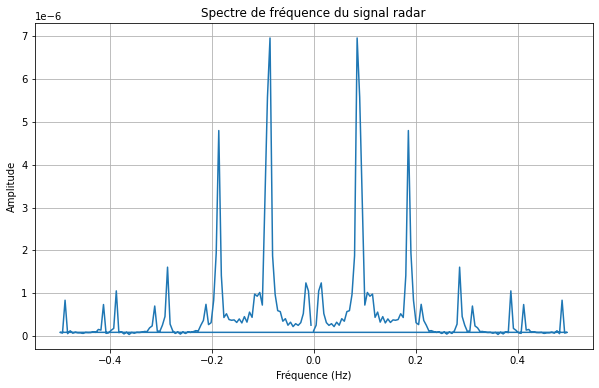

In [12]:
radar_data[6].plot()

In [23]:
df = pd.read_csv('.\Data\Data_Doa.csv')

In [37]:
def array_response_matrix(array_geometry, wavelength, theta):
    return np.exp(1j * 2 * np.pi * array_geometry * np.sin(theta) / wavelength)

# Example array geometry (in meters) for a uniform linear array (ULA) with 8 sensors
num_sensors = 8
sensor_spacing = 0.5  # Spacing between sensors
array_geometry = np.arange(num_sensors) * sensor_spacing

# Example wavelength (in meters)
wavelength = 1.0  # Adjust for your specific application

# Example angles (in degrees) for which you want to calculate the array response
angles_deg = [10, 20, 30]  # Adjust as needed

# Calculate the array response matrix for each angle
for angle_deg in angles_deg:
    theta_rad = np.deg2rad(angle_deg)
    array_response = array_response_matrix(array_geometry, wavelength, theta_rad)
    

In [24]:
R = np.cov(df)

In [25]:
# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(R)

In [39]:
# Calculate the MUSIC spectrum
angles = np.linspace(0, 90, 181)  # Angles to evaluate the spectrum (adjust as needed)
music_spectrum = np.zeros_like(angles, dtype=float)

In [56]:
# Example number of sensors and snapshots
num_sensors = 199
num_snapshots = 199

# Example array geometry (in meters) for a uniform linear array (ULA) with 8 sensors
sensor_spacing = 0.5  # Spacing between sensors
array_geometry = np.arange(num_sensors) * sensor_spacing

# Example wavelength (in meters)
wavelength = 1.0  # Adjust for your specific application

# Example angles (in degrees) for which you want to calculate the array response
angles_deg = [10, 20, 30]  # Adjust as needed

# Initialize the MUSIC spectrum array
music_spectrum = np.zeros(len(angles_deg))

# Simulate eigenvectors (replace this with your actual eigenvectors)
eigenvectors = np.random.rand(num_sensors, num_snapshots)

# Calculate the MUSIC spectrum for each angle
for i, angle_deg in enumerate(angles_deg):
    # Convert the angle to radians
    theta_rad = np.deg2rad(angle_deg)
    
    # Calculate the array response for the angle
    array_response = array_response_matrix(array_geometry, wavelength, theta_rad)
    
    # Calculate the MUSIC spectrum for this angle
    music_spectrum[i] = 1 / np.sum(np.abs(np.dot(array_response.conj().T, eigenvectors))**2)

# Now, '

In [57]:
# Identify peaks in the MUSIC spectrum
threshold_dB = -20  # Adjust the threshold as needed
peaks = np.where(10 * np.log10(music_spectrum) > threshold_dB)[0]
estimated_DOAs_deg = angles[peaks]

print("Estimated DOAs (degrees):", estimated_DOAs_deg)

Estimated DOAs (degrees): []


In [58]:
R = np.cov(df)
k = 2  # Example: use the 2 eigenvectors corresponding to the smallest eigenvalues

# Compute the interference and noise subspace using eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(R)
epsilon = 1e-6

# Add regularization to the covariance matrix
R_reg = R + epsilon * np.identity(num_sensors)
# Sort eigenvalues and eigenvectors in ascending order
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the first 'k' eigenvectors corresponding to the smallest eigenvalues
interference_noise_subspace = eigenvectors[:, :k]



# Compute the interference and noise subspace using eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(R)
interference_noise_subspace = eigenvectors[:, :k]  # Use k eigenvectors corresponding to the smallest eigenvalues

# Define the desired direction (DOA) as an example (in radians)
desired_doa = np.pi / 4  # Replace with the actual desired DOA

# Calculate the MVDR beamforming vector
reference_vector = np.exp(-1j * 2 * np.pi * array_geometry * np.sin(desired_doa) / wavelength)
mvdr_beamforming_vector = np.dot(np.linalg.inv(R), reference_vector) / np.dot(reference_vector.conj().T, np.dot(np.linalg.inv(R), reference_vector))

# Calculate the MVDR output for different directions (DOAs)
angles = np.linspace(0, 2 * np.pi, 181)  # Angles to evaluate (in radians)
mvdr_output = np.abs(np.dot(mvdr_beamforming_vector.conj().T, np.exp(-1j * 2 * np.pi * array_geometry * np.sin(angles) / wavelength)))

# Find the DOA estimate where the MVDR output is maximized
estimated_doa = angles[np.argmax(mvdr_output)]

print("Estimated DOA (radians):", estimated_doa)

LinAlgError: Singular matrix

DOA Estimate 1: -89.0 degrees[-1.55334303  1.55334303]
DOA Estimate 2: 89.0 degrees[-1.55334303  1.55334303]


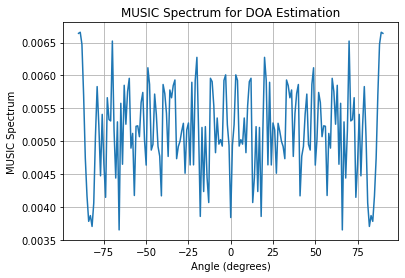

In [61]:
import numpy as np

# Simulated sensor array geometry (uniform linear array)
num_sensors = 199
sensor_spacing = 0.5  # Spacing between sensors
array_geometry = np.arange(num_sensors) * sensor_spacing

# Simulated received signal data (replace with your actual data)
# The data matrix should have dimensions (num_sensors, num_samples)
# Each column represents the received signal at each sensor
# num_samples should be greater than or equal to the number of sources
data = df

# DOA estimation parameters
num_sources = 2  # Number of sources to estimate
signal_frequency = 1000  # Frequency of the narrowband signals in Hz
speed_of_sound = 343  # Speed of sound in m/s (adjust for your scenario)

# Calculate the wavelength
wavelength = speed_of_sound / signal_frequency

# Calculate the spatial covariance matrix
covariance_matrix = np.cov(data)

# Perform eigenvalue decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Estimate the noise subspace
noise_subspace = eigenvectors[:, num_sources:]

# Create a grid of angles for DOA estimation
angles = np.linspace(-90, 90, 181)  # Angles in degrees (adjust as needed)

# Initialize an array to store the MUSIC spectrum values
music_spectrum = np.zeros(len(angles))

# Perform DOA estimation for each angle
for i, angle_deg in enumerate(angles):
    # Convert the angle to radians
    angle_rad = np.deg2rad(angle_deg)
    
    # Create the steering vector for the angle
    steering_vector = np.exp(1j * 2 * np.pi * array_geometry * np.sin(angle_rad) / wavelength)
    
    # Calculate the MUSIC spectrum value for the angle
    music_spectrum[i] = 1 / np.linalg.norm(noise_subspace.conj().T @ steering_vector)**2

# Find the DOA estimates where the MUSIC spectrum is maximized
doa_estimates_deg = angles[np.argsort(music_spectrum)[-num_sources:]]  # Top num_sources peaks

# Convert DOA estimates to radians
doa_estimates_rad = np.deg2rad(doa_estimates_deg)

# Print the DOA estimates
for i, doa_rad in enumerate(doa_estimates_rad):
    print(f"DOA Estimate {i + 1}: {np.rad2deg(doa_rad)} degrees")

# Plot the MUSIC spectrum (optional)
import matplotlib.pyplot as plt

plt.plot(angles, music_spectrum)
plt.xlabel("Angle (degrees)")
plt.ylabel("MUSIC Spectrum")
plt.title("MUSIC Spectrum for DOA Estimation")
plt.grid(True)
plt.show()


DOA Estimate: -90.0 degrees, MUSIC Spectrum: 0.0066409682999254895
DOA Estimate: -89.0 degrees, MUSIC Spectrum: 0.006657639336833803
DOA Estimate: -88.0 degrees, MUSIC Spectrum: 0.006473582934527022
DOA Estimate: -87.0 degrees, MUSIC Spectrum: 0.005701522998543275
DOA Estimate: -86.0 degrees, MUSIC Spectrum: 0.004742460222889206
DOA Estimate: -85.0 degrees, MUSIC Spectrum: 0.004165778558585296
DOA Estimate: -84.0 degrees, MUSIC Spectrum: 0.0037805811854597026
DOA Estimate: -83.0 degrees, MUSIC Spectrum: 0.0038681057322177775
DOA Estimate: -82.0 degrees, MUSIC Spectrum: 0.003703110406004698
DOA Estimate: -81.0 degrees, MUSIC Spectrum: 0.00406078363120577
DOA Estimate: -80.0 degrees, MUSIC Spectrum: 0.005077833413888392
DOA Estimate: -79.0 degrees, MUSIC Spectrum: 0.005830878557557874
DOA Estimate: -78.0 degrees, MUSIC Spectrum: 0.005242708966541281
DOA Estimate: -77.0 degrees, MUSIC Spectrum: 0.004473291627694746
DOA Estimate: -76.0 degrees, MUSIC Spectrum: 0.005408089176273864
DOA Esti

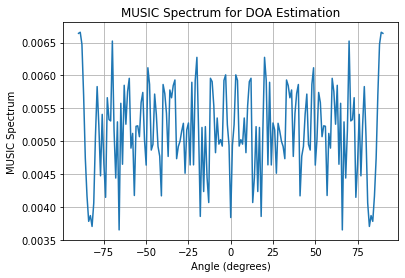

In [64]:
import numpy as np

# Simulated sensor array geometry (uniform linear array)
num_sensors = 199
sensor_spacing = 0.5  # Spacing between sensors
array_geometry = np.arange(num_sensors) * sensor_spacing

# Simulated received signal data (replace with your actual data)
# The data matrix should have dimensions (num_sensors, num_samples)
# Each column represents the received signal at each sensor
# num_samples should be greater than or equal to the number of sources
data = df

# DOA estimation parameters
num_sources = 2  # Number of sources to estimate
signal_frequency = 1000  # Frequency of the narrowband signals in Hz
speed_of_sound = 343  # Speed of sound in m/s (adjust for your scenario)

# Calculate the wavelength
wavelength = speed_of_sound / signal_frequency

# Calculate the spatial covariance matrix
covariance_matrix = np.cov(data)

# Perform eigenvalue decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Estimate the noise subspace
noise_subspace = eigenvectors[:, num_sources:]

# Create a grid of angles for DOA estimation
angles = np.linspace(-90, 90, 181)  # Angles in degrees (adjust as needed)

# Initialize arrays to store all DOA estimates and their corresponding MUSIC spectrum values
all_doa_estimates_deg = []
all_music_spectrum_values = []

# Perform DOA estimation for each angle
for i, angle_deg in enumerate(angles):
    # Convert the angle to radians
    angle_rad = np.deg2rad(angle_deg)
    
    # Create the steering vector for the angle
    steering_vector = np.exp(1j * 2 * np.pi * array_geometry * np.sin(angle_rad) / wavelength)
    
    # Calculate the MUSIC spectrum value for the angle
    music_spectrum_value = 1 / np.linalg.norm(noise_subspace.conj().T @ steering_vector)**2

    # Store the DOA estimate (in degrees) and MUSIC spectrum value in the arrays
    all_doa_estimates_deg.append(angle_deg)
    all_music_spectrum_values.append(music_spectrum_value)

# Print all DOA estimates and their corresponding MUSIC spectrum values
for doa_deg, music_val in zip(all_doa_estimates_deg, all_music_spectrum_values):
    print(f"DOA Estimate: {doa_deg} degrees, MUSIC Spectrum: {music_val}")

# Plot the MUSIC spectrum (optional)
import matplotlib.pyplot as plt

plt.plot(angles, all_music_spectrum_values)
plt.xlabel("Angle (degrees)")
plt.ylabel("MUSIC Spectrum")
plt.title("MUSIC Spectrum for DOA Estimation")
plt.grid(True)
plt.show()


DOA Estimate 1: 89.0 degrees, MUSIC Spectrum: 0.0038388918338530067
DOA Estimate 2: 91.0 degrees, MUSIC Spectrum: 0.004936465414814378


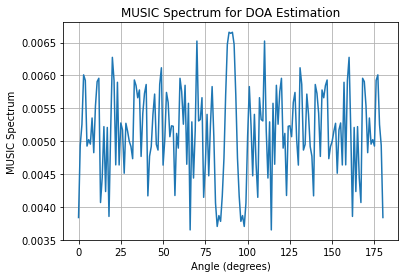

In [65]:
import numpy as np

# Simulated sensor array geometry (uniform linear array)
num_sensors = 199
sensor_spacing = 0.5  # Spacing between sensors
array_geometry = np.arange(num_sensors) * sensor_spacing

# Simulated received signal data (replace with your actual data)
# The data matrix should have dimensions (num_sensors, num_samples)
# Each column represents the received signal at each sensor
# num_samples should be greater than or equal to the number of sources
data = df

# DOA estimation parameters
num_sources = 2  # Number of sources to estimate
signal_frequency = 1000  # Frequency of the narrowband signals in Hz
speed_of_sound = 343  # Speed of sound in m/s (adjust for your scenario)

# Calculate the wavelength
wavelength = speed_of_sound / signal_frequency

# Calculate the spatial covariance matrix
covariance_matrix = np.cov(data)

# Perform eigenvalue decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Estimate the noise subspace
noise_subspace = eigenvectors[:, num_sources:]

# Create a grid of angles for DOA estimation
angles = np.linspace(0, 180, 181)  # Angles in degrees (adjust as needed)

# Initialize an array to store the MUSIC spectrum values
music_spectrum = np.zeros(len(angles))

# Perform DOA estimation for each angle
for i, angle_deg in enumerate(angles):
    # Convert the angle to radians
    angle_rad = np.deg2rad(angle_deg)
    
    # Create the steering vector for the angle
    steering_vector = np.exp(1j * 2 * np.pi * array_geometry * np.sin(angle_rad) / wavelength)
    
    # Calculate the MUSIC spectrum value for the angle
    music_spectrum[i] = 1 / np.linalg.norm(noise_subspace.conj().T @ steering_vector)**2

# Find the DOA estimates where the MUSIC spectrum is maximized
doa_estimates_deg = angles[np.argsort(music_spectrum)[-num_sources:]]  # Top num_sources peaks
doa_estimates_rad = np.deg2rad(doa_estimates_deg)

# Print all DOA estimates and their corresponding MUSIC spectrum values
for i, (doa_deg, music_val) in enumerate(zip(doa_estimates_deg, music_spectrum)):
    print(f"DOA Estimate {i + 1}: {doa_deg} degrees, MUSIC Spectrum: {music_val}")

# Plot the MUSIC spectrum (optional)
import matplotlib.pyplot as plt

plt.plot(angles, music_spectrum)
plt.xlabel("Angle (degrees)")
plt.ylabel("MUSIC Spectrum")
plt.title("MUSIC Spectrum for DOA Estimation")
plt.grid(True)
plt.show()


In [59]:
print("Estimated DOAs (degrees):", estimated_DOAs_deg)

Estimated DOAs (degrees): []


In [53]:
import numpy as np

# Collect data from the sensor array (replace with actual data)


# Calculate the spatial covariance matrix
R = np.cov(radar_data)

# Regularization parameter (adjust as needed)
epsilon = 1e-6

# Add regularization to the covariance matrix
R_reg = R + epsilon * np.identity(R.shape[0])  # Ensure dimensions match

# Compute the interference and noise subspace using eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(R_reg)

# Sort eigenvalues and eigenvectors in ascending order
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Define the number of eigenvalues/eigenvectors to use for interference and noise subspace
k = 2  # Example: use the 2 eigenvectors corresponding to the smallest eigenvalues

# Select the first 'k' eigenvectors corresponding to the smallest eigenvalues
interference_noise_subspace = eigenvectors[:, :k]

# Define the desired direction (DOA) as an example (in radians)
desired_doa = np.pi / 4  # Replace with the actual desired DOA

# Ensure array_geometry is a row vector with shape (1, num_sensors)
array_geometry = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Calculate the MVDR beamforming vector
reference_vector = np.exp(-1j * 2 * np.pi * array_geometry * np.sin(desired_doa) / wavelength)
mvdr_beamforming_vector = np.dot(np.linalg.inv(R_reg), reference_vector.reshape(-1, 1)) / np.dot(reference_vector.conj().T, np.dot(np.linalg.inv(R_reg), reference_vector.reshape(-1, 1)))

# Calculate the MVDR output for different directions (DOAs)
angles = np.linspace(0, 2 * np.pi, 181)  # Angles to evaluate (in radians)
mvdr_output = np.abs(np.dot(mvdr_beamforming_vector.conj().T, np.exp(-1j * 2 * np.pi * array_geometry * np.sin(angles) / wavelength)))

# Find the DOA estimate where the MVDR output is maximized
estimated_doa = angles[np.argmax(mvdr_output)]

print("Estimated DOA (radians):", estimated_doa)


TypeError: unsupported operand type(s) for +: 'RadarData' and 'RadarData'

## Ce bloc de code est un modèle qui montre l'architecture qu'on doit suivre !! bloc à titre indicatif !! non fonctionnel
trainer = Train.TrainerCNN()
evaluator = SignalEvaluator.SignalEvaluator()
data_loader = DataLoader.DataLoader()

# Chargez les données radar
radar_data = data_loader.load_data()

# Prétraitez les données
passage_en_temporel(radar_data)

# Divisez les données en ensembles d'entraînement et de test
train_data, test_data = trainer.split_data(preprocessed_data)

# Entraînez le modèle
trained_model = trainer.train_model(None, None)

# Évaluez les performances du modèle
evaluation_result = evaluator.evaluate_model(None, test_data, None)

# Affichez les résultats d'évaluation
print(evaluation_result)